**<h1>Dataset:</h1>**
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



In [104]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [106]:
sp1=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
sp1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [107]:
sp1.shape

(5110, 12)

dropping id since it will not be useful.

In [108]:
sp1.drop('id', axis= 1, inplace= True)

In [109]:
sp1.shape

(5110, 11)

In [110]:
sp1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [111]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(sp1[['bmi']])

sp1['bmi'] = impute.transform(sp1[['bmi']])

In [112]:
sp1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [113]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


In [114]:
sp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [115]:
cata_col=['gender','ever_married','work_type','Residence_type','smoking_status']

In [116]:
for col in cata_col:
  print('Feature name:',col)
  print(sp1[col].value_counts())
  print('==========')

Feature name: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Feature name: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
Feature name: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Feature name: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
Feature name: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [117]:
sp1.drop(sp1[sp1['gender']=='Other'].index,axis=0,inplace=True)
sp1.shape

(5109, 11)

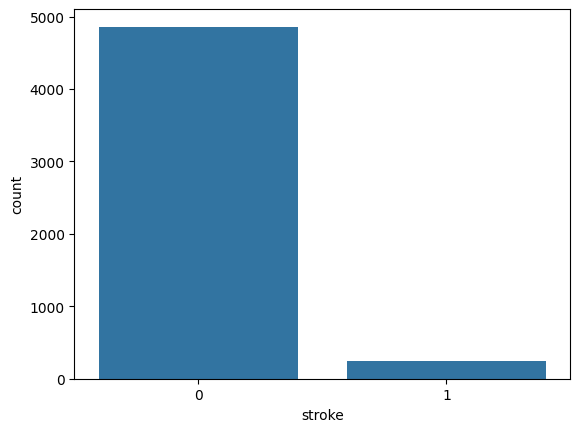

In [118]:
plt.figure()
sns.countplot(x = 'stroke', data = sp1)
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

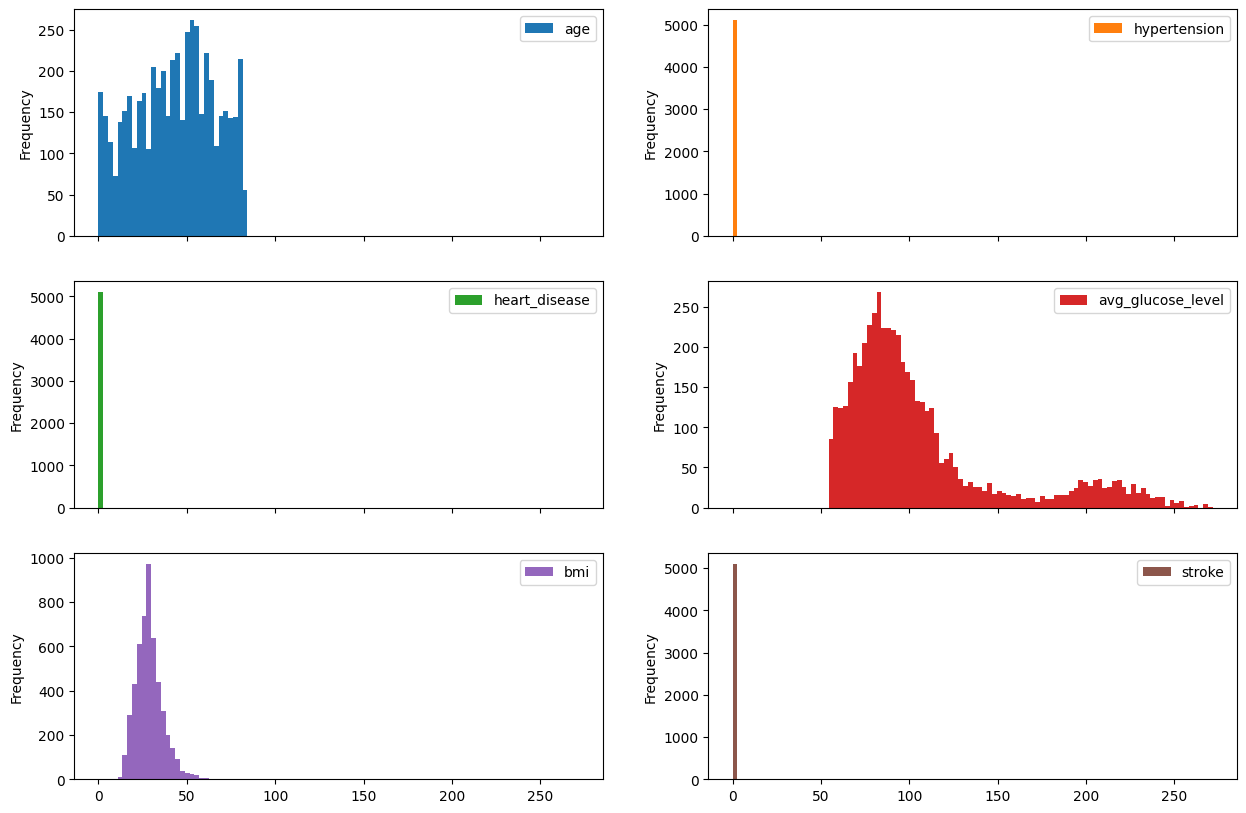

In [119]:
sp1.plot.hist(subplots=True,layout=(3,2),figsize=(15,10),bins=100)

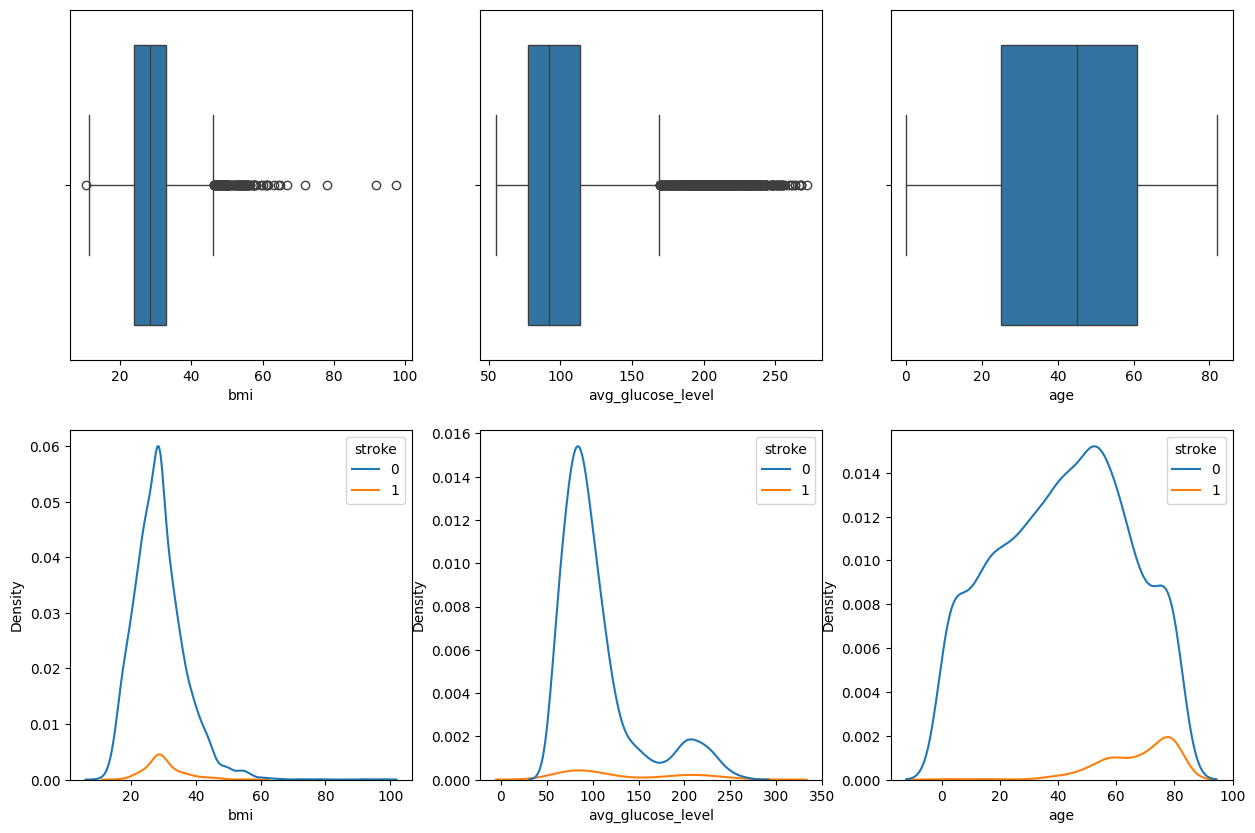

In [120]:
fig, ax = plt.subplots(2,3,figsize = (15, 10))
sns.boxplot(data=sp1, x='age', ax=ax[0,2])
sns.boxplot(data=sp1, x='avg_glucose_level', ax=ax[0,1])
sns.boxplot(data=sp1, x='bmi', ax=ax[0,0])

sns.kdeplot(x = sp1['avg_glucose_level'], hue= sp1['stroke'], ax= ax[1,1])
sns.kdeplot(x = sp1['bmi'], hue= sp1['stroke'], ax= ax[1,0])
sns.kdeplot(x = sp1['age'], hue= sp1['stroke'], ax= ax[1,2])
plt.show()

<Axes: xlabel='smoking_status', ylabel='count'>

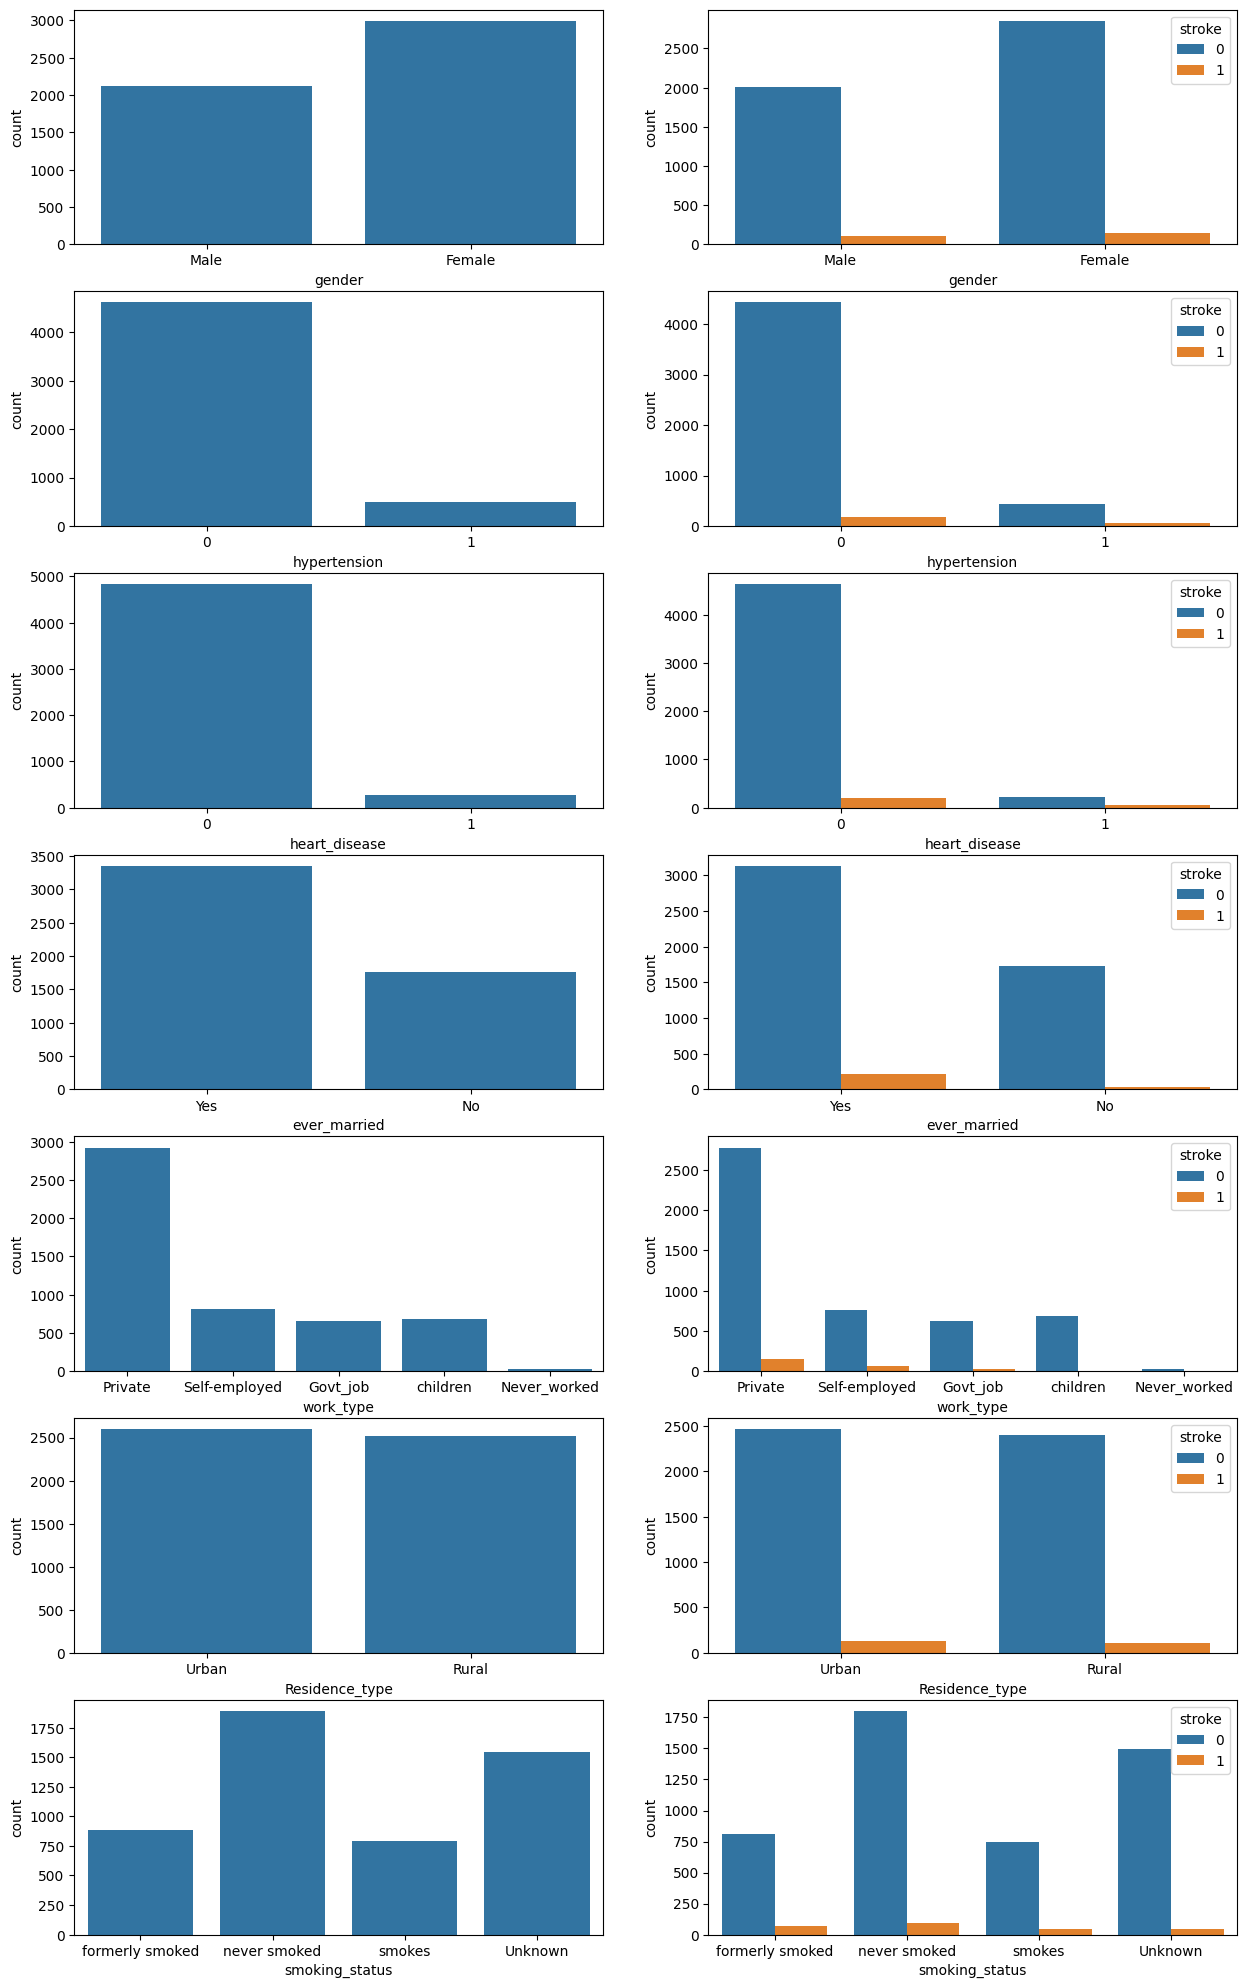

In [121]:
fig,ax = plt.subplots(7,2,figsize=(15,25))
sns.countplot(data = sp1, x = 'gender', ax=ax[0,0])
sns.countplot(data = sp1, x = 'gender',hue='stroke', ax=ax[0,1])

sns.countplot(data = sp1, x = 'hypertension', ax=ax[1,0])
sns.countplot(data = sp1, x = 'hypertension',hue='stroke', ax=ax[1,1])

sns.countplot(data = sp1, x = 'heart_disease', ax=ax[2,0])
sns.countplot(data = sp1, x = 'heart_disease',hue='stroke', ax=ax[2,1])

sns.countplot(data = sp1, x = 'ever_married', ax=ax[3,0])
sns.countplot(data = sp1, x = 'ever_married',hue='stroke', ax=ax[3,1])

sns.countplot(data = sp1, x = 'work_type', ax=ax[4,0])
sns.countplot(data = sp1, x = 'work_type',hue='stroke', ax=ax[4,1])

sns.countplot(data = sp1, x = 'Residence_type', ax=ax[5,0])
sns.countplot(data = sp1, x = 'Residence_type',hue='stroke', ax=ax[5,1])

sns.countplot(data = sp1, x = 'smoking_status', ax=ax[6,0])
sns.countplot(data = sp1, x = 'smoking_status',hue='stroke', ax=ax[6,1])

In [122]:
sp1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [123]:
co = sp1.select_dtypes(include=['number']).corr()
print(co)


                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276367       0.263777           0.238323   
hypertension       0.276367      1.000000       0.108292           0.174540   
heart_disease      0.263777      0.108292       1.000000           0.161907   
avg_glucose_level  0.238323      0.174540       0.161907           1.000000   
bmi                0.325858      0.160147       0.038862           0.168910   
stroke             0.245239      0.127891       0.134905           0.131991   

                        bmi    stroke  
age                0.325858  0.245239  
hypertension       0.160147  0.127891  
heart_disease      0.038862  0.134905  
avg_glucose_level  0.168910  0.131991  
bmi                1.000000  0.038912  
stroke             0.038912  1.000000  


<Axes: >

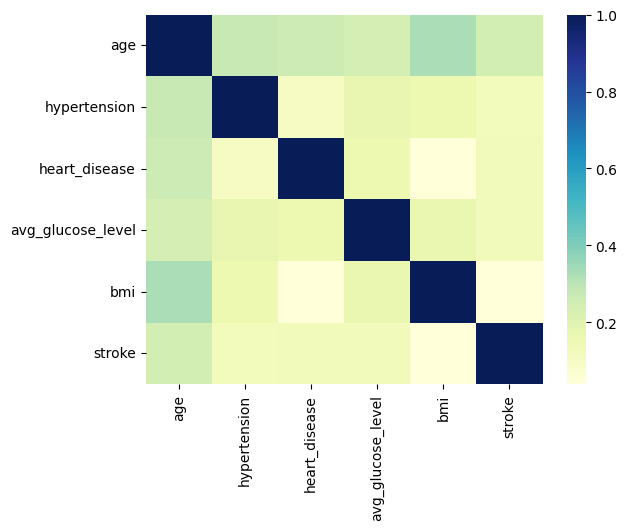

In [124]:
sns.heatmap(co,cmap = 'YlGnBu')# the string is a color map

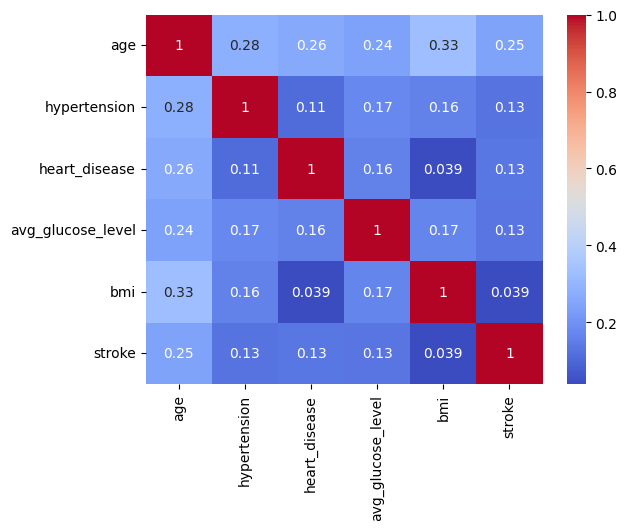

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(co, annot=True, cmap='coolwarm')
plt.show()

In [126]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

sp1['gender_enc'] = enc.fit_transform(sp1['gender'])

# Compare the two columns
print(sp1[['gender', 'gender_enc']].head())

   gender  gender_enc
0    Male           1
1  Female           0
2    Male           1
3  Female           0
4  Female           0


In [127]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_enc
count,5109,5109.000000,5109.000000,5109.000000,5109,5109,5109,5109.000000,5109.000000,5109,5109.000000,5109.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN,NaN
freq,2994,NaN,NaN,NaN,3353,2924,2596,NaN,NaN,1892,NaN,NaN
mean,NaN,43.229986,0.097475,0.054022,NaN,NaN,NaN,106.140399,28.894508,NaN,0.048738,0.413975
std,NaN,22.613575,0.296633,0.226084,NaN,NaN,NaN,45.285004,7.698235,NaN,0.215340,0.492592
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.240000,23.800000,NaN,0.000000,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.880000,28.400000,NaN,0.000000,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000,1.000000


In [128]:
cata_col=cata_col[1::]
print(cata_col)

['ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [129]:
print(sp1.columns)

for i in cata_col:
  category_enc = pd.get_dummies(sp1[i])
  sp1[category_enc.columns]=category_enc
  sp1.drop(i,axis=1,inplace=True)

print(sp1.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_enc'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [130]:
sp1.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_enc,No,Yes,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,228.69,36.600000,1,1,False,True,...,False,True,False,False,False,True,False,True,False,False
1,Female,61.0,0,0,202.21,28.893237,1,0,False,True,...,False,False,True,False,True,False,False,False,True,False
2,Male,80.0,0,1,105.92,32.500000,1,1,False,True,...,False,True,False,False,True,False,False,False,True,False
3,Female,49.0,0,0,171.23,34.400000,1,0,False,True,...,False,True,False,False,False,True,False,False,False,True
4,Female,79.0,1,0,174.12,24.000000,1,0,False,True,...,False,False,True,False,True,False,False,False,True,False


In [131]:
sp1.drop(['gender'],axis=1,inplace=True)

In [132]:
X=sp1.drop(['stroke'],axis=1)
y=sp1['stroke']

print(X.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [133]:
outliers_cols = ['avg_glucose_level','bmi']
for col in outliers_cols:
  q1 = sp1[col].quantile(.25)
  q3 = sp1[col].quantile(0.75)
  iqr= q3-q1
  up_limit = q3 + 1.5 * iqr
  low_limit = q1 - 1.5 * iqr

  sp1.loc[(sp1[col] < low_limit),col] = low_limit
  sp1.loc[(sp1[col] > up_limit),col] = up_limit

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_features=['bmi', 'avg_glucose_level', 'age']


sp1[scale_features] = scaler.fit_transform(sp1[scale_features])

In [135]:
# Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler
over_sample= RandomOverSampler(sampling_strategy='minority')

X_sample, y_sample = over_sample.fit_resample(X,y)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, train_size=0.7, test_size=0.3,
                                                      random_state=42)
print(X_train.shape)
print(X_test.shape)
sp1.head()

(6804, 19)
(2916, 19)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_enc,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,1.051242,0,1,2.058819,1.106436,1,1,False,True,False,False,True,False,False,False,True,False,True,False,False
1,0.785889,0,0,2.058819,0.023933,1,0,False,True,False,False,False,True,False,True,False,False,False,True,False
2,1.626174,0,1,0.148478,0.530544,1,1,False,True,False,False,True,False,False,True,False,False,False,True,False
3,0.255182,0,0,2.058819,0.797421,1,0,False,True,False,False,True,False,False,False,True,False,False,False,True
4,1.581949,1,0,2.058819,-0.663378,1,0,False,True,False,False,False,True,False,True,False,False,False,True,False


In [137]:
import pickle

# Save the StandardScaler and oversampling objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('oversampler.pkl', 'wb') as f:
    pickle.dump(over_sample, f)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5619 - loss: 1.2752 - val_accuracy: 0.7366 - val_loss: 0.5457
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6710 - loss: 0.6297 - val_accuracy: 0.7311 - val_loss: 0.5466
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6965 - loss: 0.5879 - val_accuracy: 0.7390 - val_loss: 0.5528
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7045 - loss: 0.5768 - val_accuracy: 0.7421 - val_loss: 0.5299
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7128 - loss: 0.5687 - val_accuracy: 0.7469 - val_loss: 0.5248
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7213 - loss: 0.5553 - val_accuracy: 0.7651 - val_loss: 0.5318
Epoch 7/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7328 - loss: 0.5343 - val_accuracy: 0.7514 - val_loss: 0.5168
Epoch 8/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.5316 - val_accuracy: 0.7620 - val_

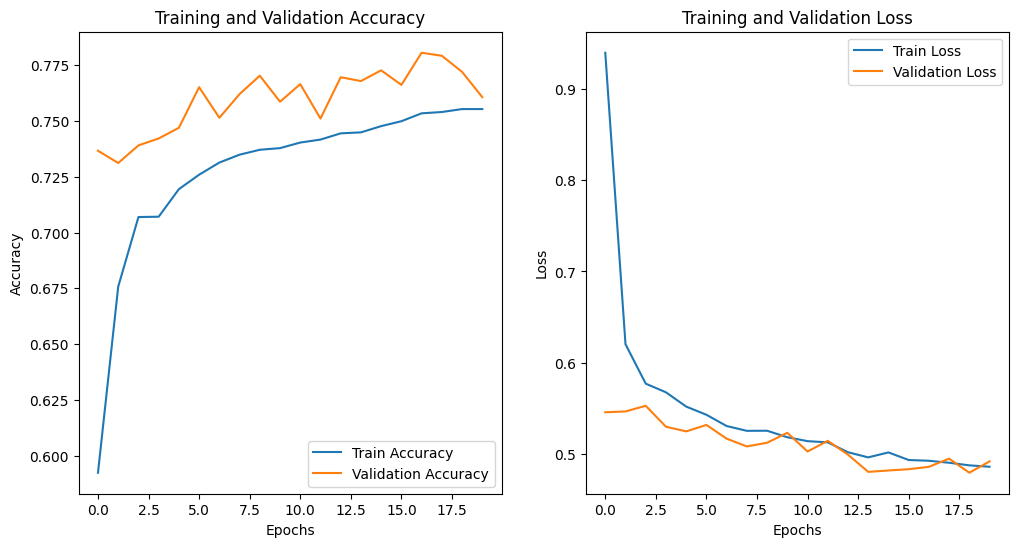

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


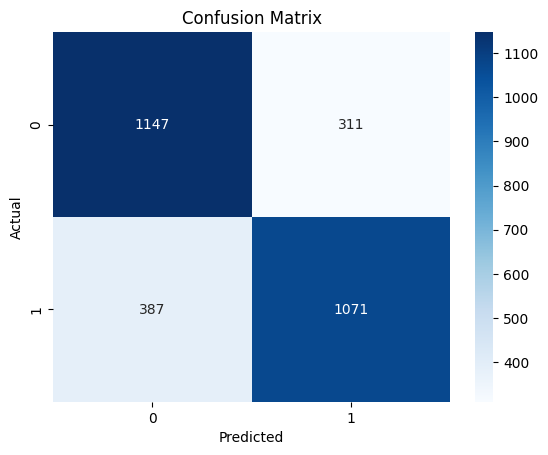

In [138]:
# Import necessary libraries
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer matching feature count
    tf.keras.layers.Dense(128, activation='relu'),               # Hidden layer 1 with 128 neurons
    tf.keras.layers.Dropout(0.3),                                # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),                # Hidden layer 2 with 64 neurons
    tf.keras.layers.Dropout(0.3),                                # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),                # Hidden layer 3 with 32 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')               # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Get predictions on test data
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tf)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [139]:
# Save the model in the recommended Keras `.keras` format
model.save('stroke_prediction_model.keras')
print("Model saved in 'stroke_prediction_model.keras'.")

Model saved in 'stroke_prediction_model.keras'.


In [140]:
import pickle
import tensorflow as tf

# Load the preprocessing objects (scaler and oversampler)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('oversampler.pkl', 'rb') as f:
    over_sample = pickle.load(f)

# Load the trained TensorFlow model
model = tf.keras.models.load_model('stroke_prediction_model.keras')
print("Model and preprocessing objects loaded successfully!")


Model and preprocessing objects loaded successfully!


In [141]:
import pandas as pd

# Sample input with all features
sample_input = pd.DataFrame([{
    'age': 70,
    'hypertension': 1,
    'heart_disease': 1,
    'avg_glucose_level': 228,
    'bmi': 38,
    'gender_enc': 1,
    'No': 1,  # Assuming 'No' corresponds to a value of 1
    'Yes': 0,  # Assuming 'Yes' corresponds to a value of 0
    'Govt_job': 1,  # Assuming 'Govt_job' is not selected
    'Never_worked': 0,  # Assuming 'Never_worked' is not selected
    'Private': 1,  # Assuming 'Private' corresponds to 1
    'Self-employed': 0,  # Assuming 'Self-employed' is not selected
    'children': 0,  # Assuming 'children' is not selected
    'Rural': 0,  # Assuming 'Rural' corresponds to 0 (or missing value)
    'Urban': 1,  # Assuming 'Urban' corresponds to 1
    'Unknown': 0,  # Assuming 'Unknown' is not selected
    'formerly smoked': 1,  # Assuming the person never smoked
    'never smoked': 0,  # Assuming the person never smoked
    'smokes': 1  # Assuming the person doesn't currently smoke
}])

# Ensure the input matches the exact feature set the model was trained on
sample_input = sample_input[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_enc',
                             'No', 'Yes', 'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children',
                             'Rural', 'Urban', 'Unknown', 'formerly smoked', 'never smoked', 'smokes']]

# List of features that need to be scaled based on the model's training
scale_features = ['bmi', 'avg_glucose_level', 'age']  # Reordered to match the scaler's expectations

# Reorder sample_input columns to match the scaler's expected order for scaling features
sample_input = sample_input[['bmi', 'avg_glucose_level', 'age'] + [col for col in sample_input.columns if col not in scale_features]]

# Preprocess the input (scaling)
sample_input[scale_features] = scaler.transform(sample_input[scale_features])

# Get prediction
sample_prediction = (model.predict(sample_input) > 0.5).astype("int32")

# Print result in a user-friendly manner
if sample_prediction[0][0] == 1:
    print("The model predicts: The person is at risk of having a stroke.")
else:
    print("The model predicts: The person is not at risk of having a stroke.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The model predicts: The person is at risk of having a stroke.
